# Sleep data analysis programm
    ## project should allow see the relationship between sleep, health and mood.

In [1]:
# The first data to train the module.
import numpy as np
import pandas as pd
df_octobersleep=pd.DataFrame({
    "day":["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16"],
    "hours":["6.26","5.03","6.08","5.40","6.13","6.23","4.41","6.66","8.90","6.65","5.21","6.48","5.48","5.16","nodata","6.35"],
    "conditions":["good","normal","good","good","good","good","normal","good","awesome","good","good","good","normal","normal","nodata","good"]  
})

dfupd1 = pd.DataFrame({
    "day":["17","18", "19","20","21","22","23","24","25","26","27","28","29","30","31"],
    "hours":["6.35", "nodata", "7.316","5.85", "5.75","nodata","6.283","5.833","nodata","6.1","5.416","3.716","6.666","7.7","9.666"],
    "conditions":["nodata","nodata","nodata","nodata","nodata","nodata","nodata","nodata","nodata","nodata","nodata","nodata","nodata","nodata","nodata"]
})

#add to new information via console exectute that: 


df_octobersleep = df_octobersleep.append(dfupd1,ignore_index = True)

addnew="n" #by default it is not running
addnew = input("Type 'y' if you WANT to add new information; Type 'n' if you DO NOT want: ")
if (addnew == "y" or addnew == "Y"):
    newinput = input()
    x = newinput.split()

    date = x[0]
    sleep_time =x[1] 
    if(len(x) >=3 ):
        condition = x[2]
    else: 
        condition= "nodata"

    upd01 = pd.DataFrame([[f"{date}", f"{sleep_time}", f"{condition}"]],columns=['day','hours','conditions'])

    df_octobersleep = pd.concat([df_octobersleep,upd01],ignore_index=True)
elif(addnew == "n" or addnew == "N"):
    print("changes declined")

with pd.ExcelWriter('D:\\Aleksei_Files\\2021_Heavy\\Python\\sleep_data_analitics\\sleepdata.xlsx') as writer:
    df_octobersleep.to_excel(writer, sheet_name="october2022",index = False)
    
workdf=pd.read_excel("D:\\Aleksei_Files\\2021_Heavy\\Python\\sleep_data_analitics\\sleepdata.xlsx","october2022")    
workdf


C:\Users\ДОМ\AppData\Local\Temp\ipykernel_5092\2540108743.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_octobersleep = df_octobersleep.append(dfupd1,ignore_index = True)


Type 'y' if you WANT to add new information; Type 'n' if you DO NOT want: n
changes declined


,day,hours,conditions
0,1,6.26,good
1,2,5.03,normal
2,3,6.08,good
3,4,5.40,good
4,5,6.13,good
5,6,6.23,good
6,7,4.41,normal
7,8,6.66,good
8,9,8.90,awesome
9,10,6.65,good


In [2]:
workdf=workdf.replace(["nodata"],np.NaN)
workdf['hours'] = workdf['hours'].astype(float)
workdf['hours'].mean()

6.187999999999999

In [3]:
#handling mising data
workdf['hours']=workdf['hours'].fillna(workdf["hours"].mean())   
workdf



,day,hours,conditions
0,1,6.260,good
1,2,5.030,normal
2,3,6.080,good
3,4,5.400,good
4,5,6.130,good
5,6,6.230,good
6,7,4.410,normal
7,8,6.660,good
8,9,8.900,awesome
9,10,6.650,good


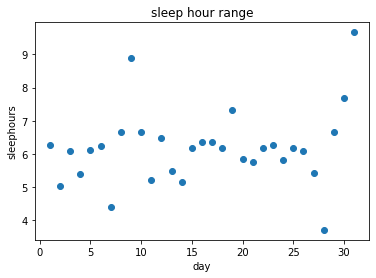

In [4]:
#first graph demonstrations
import matplotlib.pyplot as plt
%matplotlib inline

visualdf=workdf.sort_values(by='hours', ascending=True, na_position='first')

plt.scatter(visualdf.day, visualdf.hours)
plt.title("sleep hour range")
plt.ylabel("sleephours")
plt.xlabel("day")
plt.show()

In [5]:
visualdf

,day,hours,conditions
27,28,3.716,NaN
6,7,4.410,normal
1,2,5.030,normal
13,14,5.160,normal
10,11,5.210,good
3,4,5.400,good
26,27,5.416,NaN
12,13,5.480,normal
20,21,5.750,NaN
23,24,5.833,NaN
